In [15]:
from qiskit import *
from qiskit.visualization import plot_histogram

In [16]:
sub_c=QuantumCircuit(4)
sub_c.ccx(0,1,2)
sub_c.cx(0,1)
sub_c.ccx(1,3,2)
sub_c.cx(1,3)

In [17]:
sub_inst=sub_c.to_instruction()

In [18]:
qc=QuantumCircuit(4,2)

In [19]:
#entangling A and B
qc.h(0)
qc.cx(0,1)


In [20]:
qc.append(sub_inst,[0,1,2,3])


In [21]:
qc.measure(3,0)
qc.measure(2,1)


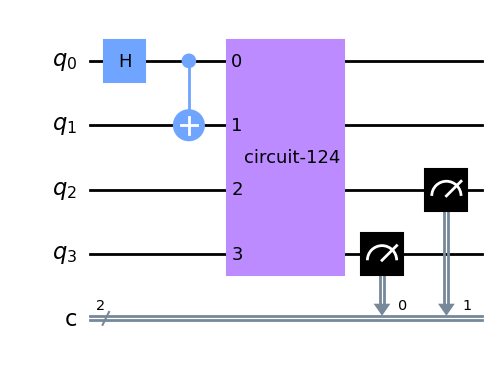

In [23]:
qc.draw('mpl')

In [22]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = backend_sim.run(transpile(qc, backend_sim), shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
print(counts)

{'10': 515, '00': 509}


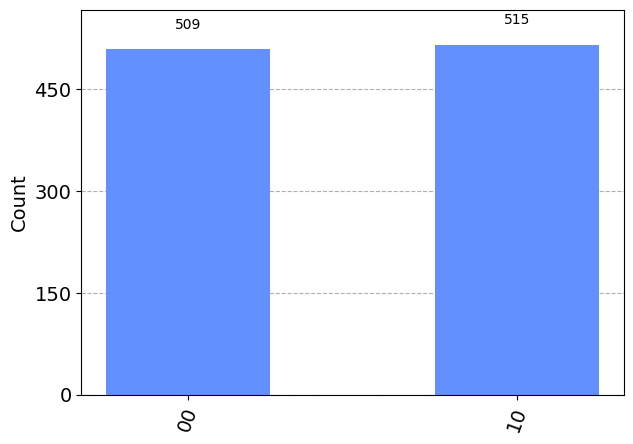

In [24]:
plot_histogram(counts)

In [ ]:
'''Here the qubits A and B are entangled in Bell state( |00>+|11>/root2 and Cin in |0>. When A is |0>, B will also be |0>. so sum is |0> and carry is |0>.
Result is |00>. When A is |1>, B is also |1> and the result is |10>.